### Remove Hashtag and Username outliers.
This dataframe takes the cleaned.pkl file for each company name. It tranforms the dataframes in such a way that the hashtags which only occur on one company profile are removed. It also removes the usernames which have an extrodanory amount of yearly posts. The dataframe without this noise is saved companyName_cleaned_noNoise.pkl document.

In [13]:
import pandas as pd
from collections import Counter

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
import nltk

import math
from scipy.stats import zscore

import matplotlib.pyplot as plt


In [14]:
food_companies = ["veganjunkfoodbar", "pastaebasta_amsterdam", "mamakellyamsterdam", "watsonsfood",
"cannibaleroyale", "parkheuvel", "restaurantfred", "hugh_rotterdam", "oldscuola", "restaurantkite",
"wturbankitchen", "thestreetfoodclub", "rumclubutrecht", "lejardinutrecht", "broei.utrecht"]

furniture_companies = ["madedotcom", "vtwonen", "hemanederland", "loods5", "ikeanederland", "homify", "westwingnl", 
"karwei", "kwantum_nederland", "xenos_nl", "homedeco", "bol_com", "leenbakker", "wonenmetlef", "_connox_",
"interiorjunkiecom", "jysknl", "wehkamp", "fonqnl", "konforhome", "basiclabel.nl", "blokker",
"deensnl", "hastensbeds", "eijerkamp", "goossenswonenenslapen", "furn.nl", "stoermetaal", "roomednl", "misterdesignnl",
"dekbeddiscounter", "woonexpress", "zitmaxx", "pronto_wonen", "designbestseller", "barbecueshop.nl",
"flinders.design", "trendhopper", "debommelmeubelen", "otto_nl", "praxis_bouwmarkt", "gamma_nl",
"pietklerkx.nl", "swisssense", "montelwonen", "aupingnl", "hacowonenenslapen", "emma_matras", "hornbachnl",
"lampenlicht.nl", "profijtmeubel", "bianonl", "woonboulevardpoortvliet", "morreswonen", "hubo_nl", "beter_bed",
"hoogenboezem.meubelen", "villajipp_outlet", "vidaxl_nl", "mline_nl"]

sport_companies = ["plutosport.nl", "voetbalshopnl", "all4runningstore", "voetbaldirect",
"dakasport", "hockeydirect.nl", "tennisdirect", "intersportnl", "aktiesport.nl", "sport2000nederland",
"soccerfanshop", "jdsportsnl", "decathlonnederland", "gorillasportsnl", "perrysport.nl"]

company_names = food_companies + furniture_companies + sport_companies

In [15]:
def extract_hashtags(company_name):
    #Using the function created at step 3 to clean the whole dataframe
    df = pd.read_pickle("../data/cleanedprofiles/{}_cleaned.pkl".format(company_name))
    buffer = []
    for hashtag_list in [value for value in df['hashtags']]:
        if len(hashtag_list) > 0:
            buffer.extend(hashtag_list)
    return buffer

In [16]:
def print_information(company_name):
    print("{} Information:".format(company_name))
    #The dataframe of the company
    df = pd.read_pickle("../data/cleanedprofiles/{}_cleaned.pkl".format(company_name))
    print("number of posts: {}".format(len(df)))
    hashtags = extract_hashtags(company_name)
    print("Total keywords: {}".format(len(hashtags)))          
    print("Unique keywords: {}".format(len(set(hashtags))))
    return df
          
print_information('loods5')

loods5 Information:
number of posts: 77702
Total keywords: 595934
Unique keywords: 95329


,userID,username,shortcode,original_text,display_url,video_url,like_count,comment_count,view_count,timestamp,cleaned_text,hashtags,userMsentions
0,270613,mooooooooooo,B2WT8FPhyi1,Pizzatime @ work 🍕,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,7,3,NaN,1568371743,pizzatime work,[],[]
1,270613,mooooooooooo,B1jHjodoZdP,Tijdens bedrijfsbezoek in Antwerpen bij Deense...,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,4,2,NaN,1566653975,tijdens bedrijfsbezoek antwerpen deense partne...,[],[]
2,270613,mooooooooooo,Bx4ZAs6CwDZ,"🤘Robby Valentine @nieuweNOR,",https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,5,1,NaN,1558777835,robby valentine nieuwenor,[],[nieuwenor]
3,270613,mooooooooooo,Bx3SqK6Bktr,Een tegekke show van Robby.Valentine !!,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,3,1,NaN,1558740950,tegekke show robby.valentine,[],[]
4,270613,mooooooooooo,BwCIXfUhqBV,Hotdog Time 🌭@ Pami workspace designers,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,6,0,NaN,1554809685,hotdog time pami workspace designers,[],[]
5,276544,wander_inge,B6d80a0nZG4,Merry Xmas 🎄😘,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,61,2,NaN,1577217992,merry xmas,[],[]
6,276544,wander_inge,B6a9ladHq5y,NaN,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,34,0,NaN,1577117730,,,
7,276544,wander_inge,B6a9b-rngYC,#nijmegenhotspots,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,44,0,NaN,1577117652,,[nijmegenhotspots],[]
8,276544,wander_inge,B6a9Tt4Hg4V,#nijmegenhotspots,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,35,6,NaN,1577117585,,[nijmegenhotspots],[]
9,276544,wander_inge,B6TMiJ-n9Um,Eerlijk? 2019 is een jaar dat ik het liefst sn...,https://scontent-lga3-1.cdninstagram.com/v/t51...,NaN,71,5,NaN,1576857132,eerlijk jaar liefst snel vergeten lastige situ...,"[topnine, 2019]",[]


# STEP 1: Remove keywords which only occur in one companyProfile
At first we had in total <b>2.595.619 --> 901.683</b> different unique hashtags. The hashtags which only occur in one userProfile are removed because these are most likely company names and stuff like that. After removing these hashtags we have 203366 unique hashtags left.

### 1.1 Store occurance of all hashtags
The occurance of all hashtags per companyProfile is stored in the '<b>hashtag_unique_check</b>' dictionary

In [18]:
#Looping though all company profiles and using the 'extract_hashtags' function to extract all hashtags from all
#company follower profiles. We count the how many times the hashtag was used.

#The dictionary 'hashtag_unique_check' shows in how many company follower profiles each hashtag was used.
hashtag_unique_check = Counter('')

for name in company_names:
    counted_hashtags = Counter(set(extract_hashtags(name)))
    hashtag_unique_check += counted_hashtags

hashtag_dictionary = dict(hashtag_unique_check)

not_unique_hashtags = [value for value in hashtag_unique_check if hashtag_unique_check[value] > 1]
unique_hashtags = [value for value in hashtag_unique_check if hashtag_unique_check[value] == 1]

In [19]:
print("Total number of different hashtags used: {}".format(len(hashtag_dictionary.keys())))
print("Number of hashtags used in only one profile: {}".format(len(unique_hashtags)))
print("Number of hashtags used in multiple profiles: {}".format(len(not_unique_hashtags)))

Total number of different hashtags used: 3463401
Number of hashtags used in only one profile: 2204600
Number of hashtags used in multiple profiles: 1258801


In [20]:
counter = 0
for hashtag in not_unique_hashtags:
    counter += hashtag_dictionary[hashtag]

print("Total number of non-unique hashtags scraped: {}".format(counter))
print("Therefore, each hashtags occurs on average: {} times.".format(counter / len(not_unique_hashtags)))

Total number of non-unique hashtags scraped: 8243563
Therefore, each hashtags occurs on average: 6.548742017205261 times.


### 1.2 Create function to load dataframe without the hashtags that should be removed

In [21]:
def companyProfile_hashtagsCleaned(company_name, hashtag_count_dictionary):
    df = pd.read_pickle("../data/cleanedprofiles/{}_cleaned.pkl".format(company_name))
    #We basically build the hashtag column here again. We check whether the value in the count dict > 1
    hashtag_buffer = []
    for lijst_hashtags in df['hashtags']:
        new_lijst_hashtags = []
        if len(lijst_hashtags) > 0:
            for hashtag in lijst_hashtags:
                if hashtag_unique_check[hashtag] > 1:
                    new_lijst_hashtags.append(hashtag)
        hashtag_buffer.append(new_lijst_hashtags)
    df['hashtags'] = hashtag_buffer
    return df

# STEP 2: Remove profile names with too many posts!
In total we <b>removed ... outlies</b>. The details of these profiles are stored in the dataframe named '<b>outliers_yearlyPosts_df</b>'

### 2.1 We first need one big dataframe containing all posts of all users (impossible). We read one-by-one now.
We use the companyProfile_hashtagsCleaned function defined in part 1 so we are sure that the non-relevant hashtags are already removed

In [22]:
total_extracted_posts = 0

for company_name in company_names:
    temp_df = pd.read_pickle('../data/cleanedprofiles/{}_cleaned.pkl'.format(company_name))
    total_extracted_posts += len(temp_df)

print("total posts without removing accounts: {}".format(total_extracted_posts))

total posts without removing accounts: 10278005


### 2.2 Create dataframe which shows details per username

In [23]:
# Here we loop through all followerProfile and we count the number of times each
# username posted. and store the number of hashtags the user used within its posts.
username_data = {}
c_userPosts = Counter('')

for company_name in company_names:
    print(company_name)
    temp_df = pd.read_pickle('../data/cleanedprofiles/{}_cleaned.pkl'.format(company_name))
    usernames = [value for value in temp_df['username']] 
    u_usernames = [value for value in set(usernames)]
    
    #Looping through usernames to detect how much hashtags each user posted.
    for user in u_usernames:
        hashtag_buffer = []
        username_df = temp_df.loc[temp_df['username'] == user]
        for hashtag_list in [value for value in username_df['hashtags']]:
            hashtag_buffer.extend(hashtag_list)
        
        #Checking if we already know the user. If this is the case we just skip him for now.
        if user in username_data.keys():
            continue
        else:
            username_data[user] = {'number_of_posts' : len(username_df),
                                  'total_hashtags' : len(hashtag_buffer),
                                  'unique_hashtags' : len([value for value in set(hashtag_buffer)])
                                  }
    #For this temp_df count how many times each user posted.
    usernames_number_posts = Counter(usernames)
    #Adding everything to the buffer named 'c_userPosts'
    c_userPosts += usernames_number_posts


c_userPosts.most_common(5)    

veganjunkfoodbar
pastaebasta_amsterdam
mamakellyamsterdam
watsonsfood
cannibaleroyale
parkheuvel
restaurantfred
hugh_rotterdam
oldscuola
restaurantkite
wturbankitchen
thestreetfoodclub
rumclubutrecht
lejardinutrecht
broei.utrecht
madedotcom
vtwonen
hemanederland
loods5
ikeanederland
homify
westwingnl
karwei
kwantum_nederland
xenos_nl
homedeco
bol_com
leenbakker
wonenmetlef
_connox_
interiorjunkiecom
jysknl
wehkamp
fonqnl
konforhome
basiclabel.nl
blokker
deensnl
hastensbeds
eijerkamp
goossenswonenenslapen
furn.nl
stoermetaal
roomednl
misterdesignnl
dekbeddiscounter
woonexpress
zitmaxx
pronto_wonen
designbestseller
barbecueshop.nl
flinders.design
trendhopper
debommelmeubelen
otto_nl
praxis_bouwmarkt
gamma_nl
pietklerkx.nl
swisssense
montelwonen
aupingnl
hacowonenenslapen
emma_matras
hornbachnl
lampenlicht.nl
profijtmeubel
bianonl
woonboulevardpoortvliet
morreswonen
hubo_nl
beter_bed
hoogenboezem.meubelen
villajipp_outlet
vidaxl_nl
mline_nl
plutosport.nl
voetbalshopnl
all4runningstore
voe

[('cocosmile_me', 35118),
 ('shopparadise.com99', 19017),
 ('katelifeofficial', 14995),
 ('createdbyesmeewouters', 13625),
 ('giannisalamanoglou', 11423)]

In [24]:
user_dataframe = pd.DataFrame(username_data).transpose()
user_dataframe.head()

,number_of_posts,total_hashtags,unique_hashtags
yaraoldenburg,5,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
melidominguez_,177,1987,182


# ALERT: DO NOT BOTH RUN 2.3 AND 2.4 YOU HAVE TO CHOOSE

### 2.3 Detect userIDs with a Z-score of > 3 based on number_of_posts
As can be seen in the picture above; we definitely have some large outliers. They should be removed! In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.<br>
Note: Apparently we have discovered 164 outliers with a Z-score of highere than 3.0!

In [ ]:
#First create a dataframe that shows the Z-score for the column 'number_of_posts'
user_dataframe_zscore = user_dataframe[['number_of_posts']].apply(zscore)
user_dataframe['number_of_posts_zscore'] = user_dataframe_zscore['number_of_posts']

In [ ]:
outliers_yearlyPosts_df = user_dataframe.loc[user_dataframe['number_of_posts_zscore'] > 3]
outlier_usernames = [username for username in outliers_yearlyPosts_df.index]

In [ ]:
print('Number of usernames which have posted way too much: {}'.format(len(outlier_usernames)))

### 2.4 Detect userIDs deviating > 2.5 MAD from the median <br> 

In [25]:
import numpy as np

print('Information on yearly posts per username:')

mean = np.mean([value for value in user_dataframe['number_of_posts']])
median = np.median([value for value in user_dataframe['number_of_posts']])

print("median: {}".format(median))
print("mean: {}".format(mean))

absolute_mean_distance = 0
for value in [value for value in user_dataframe['number_of_posts']]:
    mean_difference = value - mean
    absolute_mean_distance += abs(mean_difference)
    
mean_absolute_deviation = absolute_mean_distance / len([value for value in user_dataframe['number_of_posts']])

print("mean absolute deviation (MAD): {}".format(mean_absolute_deviation))

print("valid zone = 0 until {}".format(median + (2.5*mean_absolute_deviation)))

MAD_userframe = user_dataframe.loc[user_dataframe['number_of_posts'] > 164.45481786407854]
false_names_df = user_dataframe[user_dataframe.index.isin([value for value in MAD_userframe.index])]
outlier_usernames = [value for value in false_names_df.index]
print('Number of usernames which have posted way too much: {}'.format(len(outlier_usernames)))

Information on yearly posts per username:
median: 22.0
mean: 55.13440822558729
mean absolute deviation (MAD): 56.23222840672501
valid zone = 0 until 162.5805710168125
Number of usernames which have posted way too much: 10300


### 2.5 Create a list with only the valid usernames.
 MAD method removes <b>7056</b> names while the Z-score method removed <b>744</b> usernames

In [26]:
#Finally, create a list with valid usernames.
#Also define a list with valid usernames (the non outliers)
no_outlier_usernames = [value for value in user_dataframe.index if value not in outlier_usernames]
user_dataframe_noOutliers = user_dataframe[user_dataframe.index.isin(no_outlier_usernames)]
#Store the dataframe with outliers so we can still analyse them
user_dataframe_noOutliers

user_dataframe_withOutliers = user_dataframe
user_dataframe = user_dataframe_noOutliers
user_dataframe

,number_of_posts,total_hashtags,unique_hashtags
yaraoldenburg,5,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
NaN,0,0,0
_aki.x,3,28,22
ameli.bellule,13,63,37


# FINAL: 2.6 Ceate new _cleaned file for each companyProfile
We now know which usernames are the outliers and which hashtags are not allowed. Therefore we will not create a new file named companyName_cleanedImproved.pkl where both are removed.

In [6]:
#Loops through all company names and created a dataframe where the outliers are removed. 
#It prints shows the total number of posts collected per company.

for company_name in company_names:    
    df_hashtagscleaned = companyProfile_hashtagsCleaned(company_name, hashtag_unique_check)
    df_cleaned = df_hashtagscleaned[df_hashtagscleaned['username'].isin(no_outlier_usernames)]
    df_cleaned.to_pickle("../data/noNoise/{}_cleaned_noNoise.pkl".format(company_name))
    print("{} - {}".format(company_name, len(df_cleaned)))

NameError: name 'hashtag_unique_check' is not defined

### EXTRA: 2.7 Visualise - Show the characteristics of the dataset we will be using during this research

In [156]:
# Now lets plot the characteristics of the cleaned companyProfiles
def print_information(company_name):
    company_information = {}
    #The dataframe of the company
    df = pd.read_pickle("../data/noNoise/{}_cleaned_noNoise.pkl".format(company_name))
    
    company_information['sample_size'] = len(set([value for value in df['username']]))
    company_information['number_of_posts'] = len(df)
    
    hashtags = extract_hashtags(company_name)
    company_information['total_hashtags'] = len(hashtags)
    company_information['unique_hashtags'] = len(set(hashtags))
        
    no_text_counter = 0
    no_hashtag_counter = 0
    no_userMentions_counter = 0
    
    for value in [value for value in df['cleaned_text']]:
        if value == '':
            no_text_counter += 1
            
    for value in [value for value in df['hashtags']]:
        if len(value) == 0:
            no_hashtag_counter += 1
            
    for value in [value for value in df['userMsentions']]:
        if len(value) == 0:
            no_userMentions_counter += 1
                    
    company_information['%_no_hashtags'] = no_hashtag_counter / len(df) * 100
    company_information['%_no_userMentions'] = no_userMentions_counter / len(df) * 100
    company_information['%_no_text'] = no_text_counter / len(df) * 100
    return company_information

In [157]:
#Use the functiont to create a dataframe
all_information = {}
for company in company_names:
    all_information[company] = print_information(company)
    
data_overview = pd.DataFrame(all_information).transpose()

In [164]:
data_overview.to_excel('insta_followerprofile/DATAOVERVIEW.xlsx')

### EXTRA: 2.8 Visualise - Remove the outliers (Z-score) from the user_dataframe and plot some details

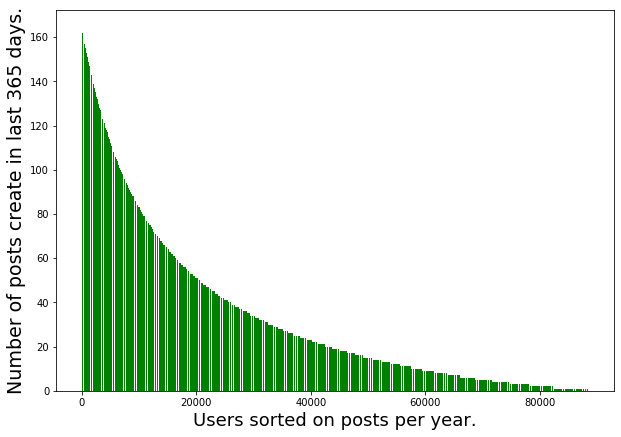

In [36]:
fig = plt.figure(figsize=(10,7))
fig.savefig('fig1.png', dpi = 300)
plt.bar([value for value in range(len(user_dataframe_noOutliers))], sorted([value for value in user_dataframe_noOutliers['number_of_posts']], reverse=True), color='g')
#Adding labels to the picture
plt.xlabel('Users sorted on posts per year.', fontsize=18)
plt.ylabel('Number of posts create in last 365 days.', fontsize=19)

plt.savefig('insta_followerprofile/images/postsPerUsername.png', dpi = 300)
plt.show()